In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_all.fea')

In [4]:
noun_sentence_df_final_joined_df_selected_columns_use_min = noun_sentence_df_final_joined_df_selected_columns_use_min.dropna()

In [5]:
noun_sentence_df_final_joined_df_selected_columns_use_min.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

In [6]:
predictor_columns = [   'sentence_composition_7_y',
 'AVM_Error_Indicators_5_y',
 'sentence_composition_7',
 'AVM_Error_Indicators_4_y',
 'AVM_Error_Indicators_5_x',
 'AVM_Error_Indicators_0',
 'AVM_Error_Indicators_10_x',
 'AVM_Error_Indicators_11_y',
 'AVM_Error_Indicators_4_x',
 'cj_living_area_x',
 'AVM_Error_Indicators_6_x',
 'AVM_Error_Indicators_0_x',
 'avmValue_x']

In [7]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use_min.loc[:,predictor_columns].to_numpy()

In [8]:
Predictors.shape

(400756, 13)

In [9]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use_min.avmerror.values

In [10]:
predictand.shape

(400756,)

In [11]:
train_samples = 200000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [12]:
np.max(X_train)

5199509.02

In [13]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [14]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=64,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [15]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [16]:
y_train.min()

-1.492387621359223

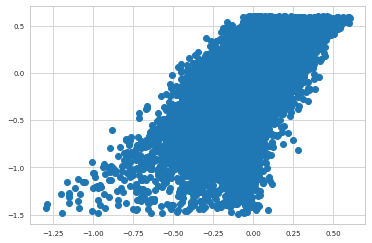

In [17]:
plt.plot(predictions_train,y_train,'o')

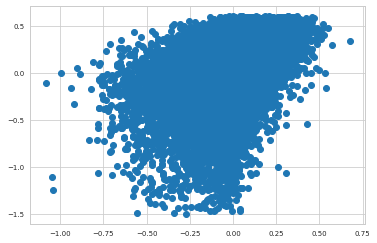

In [18]:
plt.plot(predictions_test,y_test,'o')

In [19]:
df = noun_sentence_df_final_joined_df_selected_columns_use_min.copy()


In [20]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [21]:
print(df.head(1)['avmValue'])
print(df.head(1)['Transprice'])
print(df.head(1)['avmerror'])
print(df.head(1)['avmValue']+df.head(1)['avmerror']*df.head(1)['avmValue'])
print((df.head(1)['Transprice']-df.head(1)['avmValue'])/df.head(1)['Transprice'])

0    135660.77
Name: avmValue, dtype: float64
0    150000.0
Name: Transprice, dtype: float64
0    0.095595
Name: avmerror, dtype: float64
0    148629.24322
dtype: float64
0    0.095595
dtype: float64


In [22]:
df.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

In [23]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.10803326476820406
0.12211574741864119


In [24]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.10892758174894443
0.11670730944205586


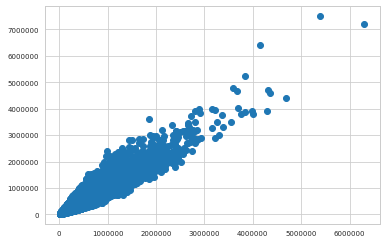

In [25]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [26]:
df.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

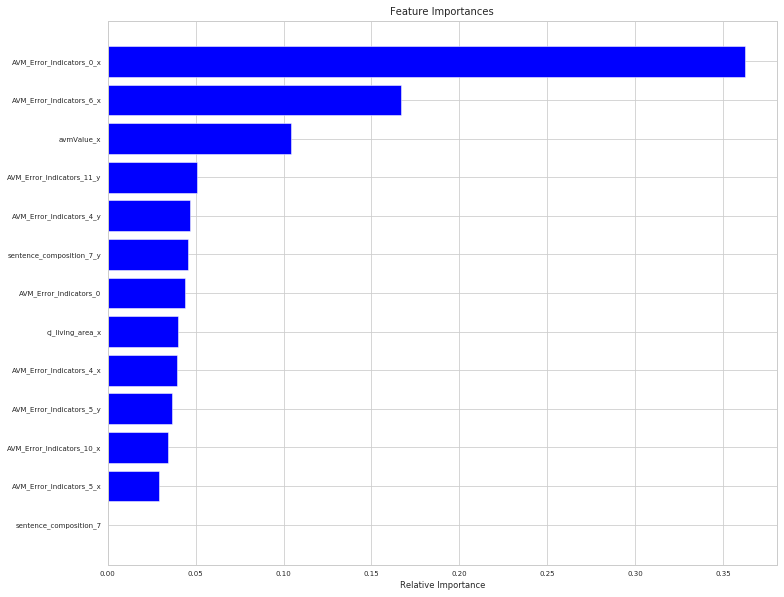

In [33]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
import joblib
filename = 'XG_newmodel_01_3mins.sav'
joblib.dump(model,filename)

['XG_newmodel_01_3mins.sav']

In [29]:
noun_sentence_df_final_joined_df_selected_columns_use_min_top = \
    noun_sentence_df_final_joined_df_selected_columns_use_min.head(200000)

In [30]:
noun_sentence_df_final_joined_df_selected_columns_use_min_top = noun_sentence_df_final_joined_df_selected_columns_use_min_top.drop(columns=['level_0'])

In [31]:
noun_sentence_df_final_joined_df_selected_columns_use_min_top.reset_index().to_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_test_3mins.fea')